# ground truth data generation

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

from glob import glob
from tqdm import tqdm

resize_size=224

def img_load_gray(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (resize_size, resize_size))
    return img

def img_load(path):
    img = cv2.imread(path)[:,:,::-1]
    img = cv2.resize(img, (resize_size, resize_size))
    return img

train_png = sorted(glob('raw_data/train/*.png'))
train_imgs = np.array([img_load(m) for m in tqdm(train_png)])
train_y = pd.read_csv("raw_data/train_df.csv")

len(train_imgs[train_y["state"]=="good"]), len(train_imgs[train_y["state"]!="good"])

100%|██████████████████████████████████████████████████████████████████████████████| 4277/4277 [01:22<00:00, 51.60it/s]


(3629, 648)

In [2]:
root_dir = 'MVTecAD'
 
img_path_list = []
possible_img_extension = ['.png']

for (root, dirs, files) in os.walk(root_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in possible_img_extension:
                img_path = root + '/' + file_name
                img_path = img_path.replace('\\', '/')
                img_path_list.append(img_path)
                
gt_list=list(filter(lambda x: 'mask' in x, img_path_list))
bad_list=list(filter(lambda x: 'mask' not in x and 'good' not in x, img_path_list))
good_list =list(filter(lambda x: 'good' in x, img_path_list))

gt_imgs = np.array([img_load_gray(m) for m in tqdm(gt_list)])
bad_imgs = np.array([img_load(n) for n in tqdm(bad_list)])
good_imgs = np.array([img_load(n) for n in tqdm(good_list)])

gt_imgs.shape, bad_imgs.shape, good_imgs.shape

100%|██████████████████████████████████████████████████████████████████████████████| 4096/4096 [01:19<00:00, 51.49it/s]


((1258, 224, 224), (1258, 224, 224, 3), (4096, 224, 224, 3))

In [3]:
train_id = np.std(train_imgs.reshape(len(train_imgs), -1), axis=1)
bad_id = np.std(bad_imgs.reshape(len(bad_imgs), -1), axis=1)
_, train_id, bad_id = np.intersect1d(train_id, bad_id, assume_unique=True, return_indices=True)

len(train_id), len(bad_id)

(648, 648)

In [4]:
import shutil

old_id = list(np.array(gt_list)[bad_id])
new_id = list(train_y["file_name"][train_id])

for _ in tqdm(range(len(bad_id))):
    src = old_id[_]
    dst = 'gt_data/'+new_id[_]
    shutil.copy(src, dst)

100%|███████████████████████████████████████████████████████████████████████████████| 648/648 [00:00<00:00, 744.47it/s]


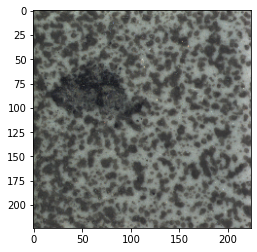

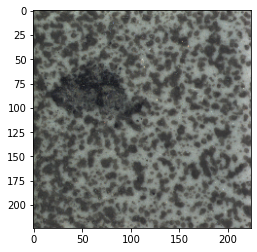

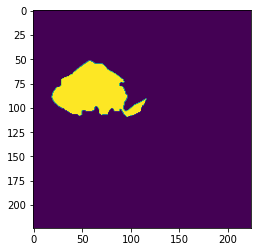

In [5]:
idx=100

plt.imshow(train_imgs[train_id][idx]/255)
plt.show()
plt.imshow(bad_imgs[bad_id][idx]/255)
plt.show()
plt.imshow(gt_imgs[bad_id][idx]/255)
plt.show()